## Analysis Question 3
### Is the climate reported by news proportionally to C02 Emissions or Energy Output?

- Quantity of articles published overall increased while CO2 Emissions decreased in the US. However, quantity of articles increase as Energy Output increased. Percentage of change year over year for articles varied dramatically whereas with CO2 Emissions and Energy Output the % change was small. 

- The correlation coefficient between articles and CO2 emissions is **-0.030**, suggesting a very weak correlation.
- The correlation coefficient between articles and Energy Output is **0.495**, suggesting a moderately high correlation.

- The sharing and publishing of articles relating to environmental information may be highly influenced by public interest, media trends and other factors, rather than statistical increase or decrease in CO2 Emissions or Energy Output.

### Other Findings

- Overall, article volume increased, peaking at **2019** in the dataset at a rate of **44 articles** per year.
- US CO2 Emissions have significantly decreased over time at a rate of **-0.0109 Megatons** per year.
- Energy output increased by **0.0112 Trillion Megawatt Hours** per year, showing a significant rate of increase. 

### Data Used

- **NYT Articles regarding Environment (2001-2020)** (nyt_arts_list_by_year.csv)
- **Energy Output (US) (2001-2020)** (us_total_energy_out.csv)
- **CO2 Emissions (2001-2020)** (world_emission_data.csv)

### Limitations of Data

- CO2 and Energy data is limited to the United States.
- Only articles from the New York Times were gathered for the NYT Articles Dataset, which may be a narrow scope of data.
- Energy Output does not necessarily mean Energy Production, the dataset does not clarify whether the data is a measurement of energy output or raw energy production, which means it may or may not be accounting for waste, loss, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns


# Read the data from a CSV file
df_graph = pd.read_csv('Data/nyt_arts_list_by_year.csv', index_col=0)
df_graph = df_graph[df_graph['Years'] != 2021]
df_graph

,Years,#Articles
0,2001,297
1,2002,322
2,2003,261
3,2004,232
4,2005,329
5,2006,684
6,2007,1121
7,2008,1121
8,2009,1256
9,2010,724


In [2]:
df_graph_2 = pd.read_csv('Data/world_emission_data.csv', index_col=0)

df_graph_2 = df_graph_2.transpose()

df_graph_2 = df_graph_2["United States of America"]
df_graph_2 = pd.DataFrame(df_graph_2)
df_graph_2 = df_graph_2.reset_index()
df_graph_2['index'] = df_graph_2['index'].astype('int64')
df_graph_2['United States of America'] = df_graph_2['United States of America'].astype('int64')
df_graph_2 = df_graph_2[df_graph_2['index'] != 2000]
df_graph_2['United States of America'] = (df_graph_2['United States of America'] / 10000000).round(2)

df_graph_2

,index,United States of America
1,2001,1.57
2,2002,1.58
3,2003,1.59
4,2004,1.64
5,2005,1.64
6,2006,1.60
7,2007,1.63
8,2008,1.58
9,2009,1.47
10,2010,1.51


In [3]:
# Read the data from a CSV file
df_graph_3 = pd.read_csv('Data/us_total_energy_out.csv', index_col=0)

df_graph_3 = df_graph_3[df_graph_3['Years'] != 2021]
df_graph_3 = df_graph_3[df_graph_3['Years'] != 2000]
df_graph_3['Energy Production (thousand megawatthours)'] = (df_graph_3['Energy Production (thousand megawatthours)'] / 1000000).round(2)
df_graph_3

,Years,Energy Production (thousand megawatthours)
0,2001,3.74
1,2002,3.86
2,2003,3.88
3,2004,3.97
4,2005,4.06
5,2006,4.06
6,2007,4.16
7,2008,4.12
8,2009,3.95
9,2010,4.13


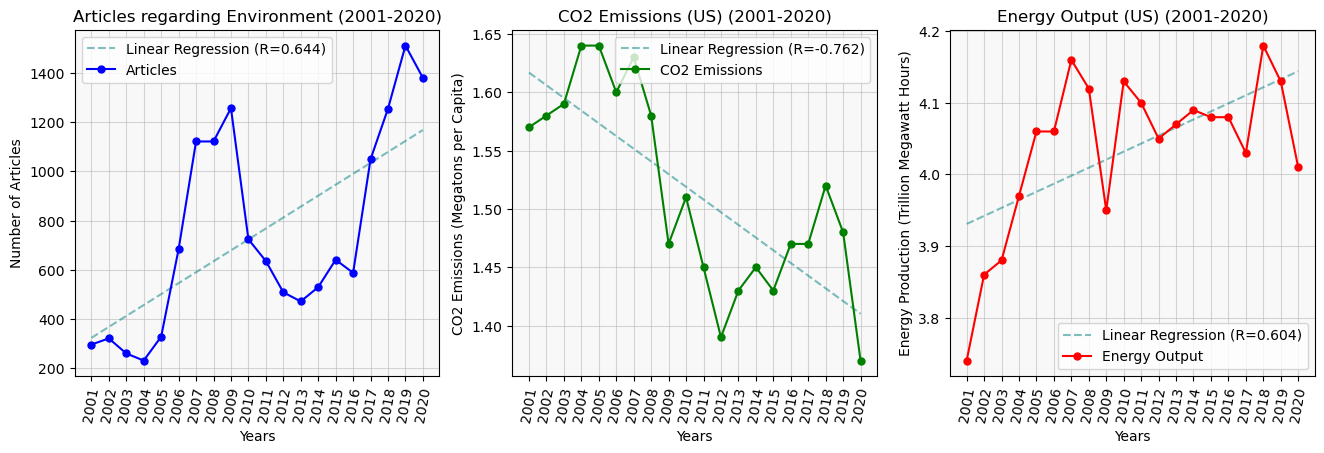

P-Value for Articles is 0.0021953884673030694
Linear Regression (R) for Articles is 0.6436950509307464
Linear Regression (R) for CO2 Emissions is -0.7617453467634492
Linear Regression (R) for Energy Output is 0.6041665726135839
For Articles, y = 44.37669172932331x + -88473.59
For CO2 Emissions, y = -0.010879699248120305x + 23.39
For Energy Output, y = 0.011225563909774437x + -18.53


In [4]:
# Create the first plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4.5))

# Linear Regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df_graph['Years'], df_graph['#Articles'])
ax[0].plot(df_graph['Years'], slope1*df_graph['Years'] + intercept1, color='teal', label=f'Linear Regression (R={r_value1:.3f})', linestyle="--", alpha=0.5)

# First Plot
ax[0].plot(df_graph['Years'], df_graph['#Articles'], label="Articles", color="blue", markersize=5, marker="o")
ax[0].legend(loc='upper left')
ax[0].set_facecolor('#F8F8F8')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Number of Articles')
ax[0].set_title('Articles regarding Environment (2001-2020)')
ax[0].set_xticks(df_graph['Years'])
ax[0].tick_params(axis='x', rotation=80)
ax[0].grid(alpha=0.5)

# Create the second plot

# Linear Regression
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df_graph_2['index'], df_graph_2['United States of America'])
ax[1].plot(df_graph_2['index'], slope2*df_graph_2['index'] + intercept2, color='teal', label=f'Linear Regression (R={r_value2:.3f})', linestyle="--", alpha=0.5)

# Second Plot
ax[1].plot(df_graph_2['index'], df_graph_2['United States of America'], label="CO2 Emissions", color="green", markersize=5, marker="o")
ax[1].legend(loc='upper right')
ax[1].set_facecolor('#F8F8F8')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('CO2 Emissions (Megatons per Capita)')
ax[1].set_title('CO2 Emissions (US) (2001-2020)')
ax[1].set_xticks(df_graph_2['index'])
ax[1].tick_params(axis='x', rotation=80)
ax[1].grid(alpha=0.5)

# Create the third plot

# Linear Regression
slope3, intercept3, r_value3, p_value3, std_err2 = linregress(df_graph_3['Years'], df_graph_3['Energy Production (thousand megawatthours)'])
ax[2].plot(df_graph_3['Years'], slope3*df_graph_3['Years'] + intercept3, color='teal', label=f'Linear Regression (R={r_value3:.3f})', linestyle="--", alpha=0.5)

# Third Plot
ax[2].plot(df_graph_3['Years'], df_graph_3['Energy Production (thousand megawatthours)'], label="Energy Output", color="red", markersize=5, marker="o")
ax[2].legend(loc='lower right')
ax[2].set_facecolor('#F8F8F8')
ax[2].set_xlabel('Years')
ax[2].set_ylabel('Energy Production (Trillion Megawatt Hours)')
ax[2].set_title('Energy Output (US) (2001-2020)')
ax[2].set_xticks(df_graph_3['Years'])
ax[2].tick_params(axis='x', rotation=80)
ax[2].grid(alpha=0.5)

plt.savefig("Visual/Q3_Fig_1-Articles_Emissions_Output.png")

# Show the plot
plt.show()
print(f"P-Value for Articles is {p_value1}")
print(f"Linear Regression (R) for Articles is {r_value1}")
print(f"Linear Regression (R) for CO2 Emissions is {r_value2}")
print(f"Linear Regression (R) for Energy Output is {r_value3}")


print(f"For Articles, y = {slope1}x + {intercept1:.2f}")
print(f"For CO2 Emissions, y = {slope2}x + {intercept2:.2f}")
print(f"For Energy Output, y = {slope3}x + {intercept3:.2f}")

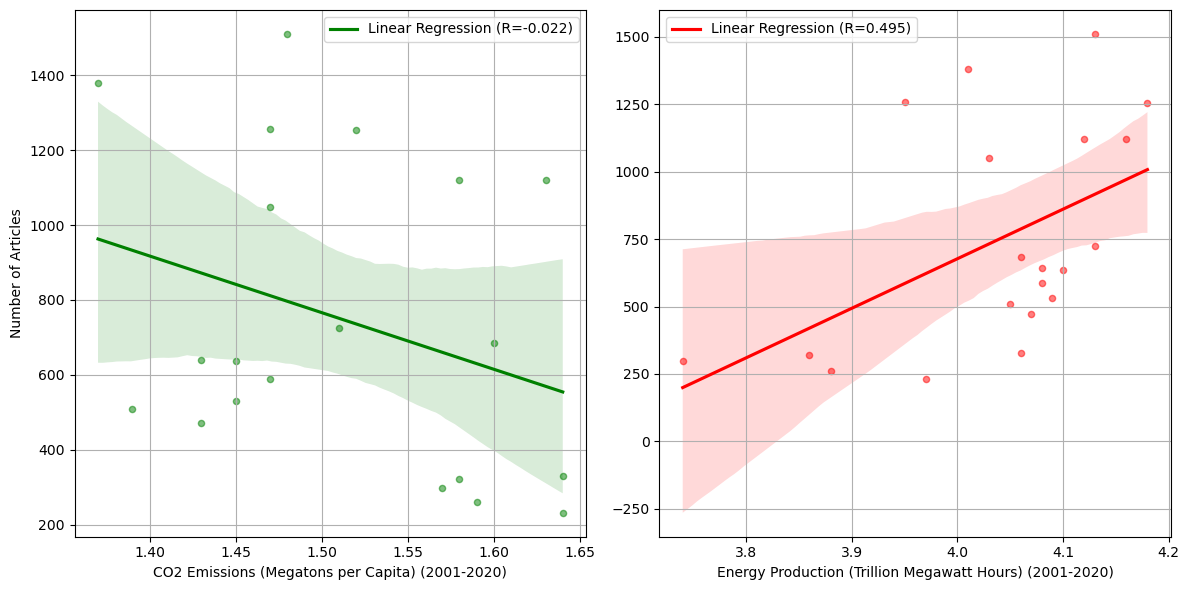

Correlation Coefficient (R) for Articles vs CO2 Emissions is -0.02212659745113151
Correlation Coefficient (R) for Articles vs Energy Production is 0.49479639150597016


In [5]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Plot the first subplot

# Calculate the correlation coefficient
corr1 = df_graph_2['United States of America'].corr(df_graph['#Articles'])

sns.regplot(x=df_graph_2['United States of America'], y=df_graph['#Articles'], color="green",
            scatter_kws={'s': 20, 'alpha': 0.5},
            line_kws={'label': f"Linear Regression (R={corr1:.3f})"},
            ax=axs[0])
axs[0].set_xlabel('CO2 Emissions (Megatons per Capita) (2001-2020)')
axs[0].set_ylabel('Number of Articles')
axs[0].legend()
axs[0].grid()

# Second subplot

# Calculate the correlation coefficient
corr2 = df_graph_3['Energy Production (thousand megawatthours)'].corr(df_graph['#Articles'])

sns.regplot(x=df_graph_3['Energy Production (thousand megawatthours)'], y=df_graph['#Articles'], color="red",
            scatter_kws={'s': 20, 'alpha': 0.5},
            line_kws={'label': f"Linear Regression (R={corr2:.3f})"},
            ax=axs[1])
axs[1].set_xlabel('Energy Production (Trillion Megawatt Hours) (2001-2020)')
axs[1].set_ylabel('')
axs[1].legend()
axs[1].grid()


plt.savefig("Visual/Q3_Fig_2-Correlation_Emissions_Output.png")

# Show the plot
plt.tight_layout()
plt.show()
print(f"Correlation Coefficient (R) for Articles vs CO2 Emissions is {corr1}")
print(f"Correlation Coefficient (R) for Articles vs Energy Production is {corr2}")

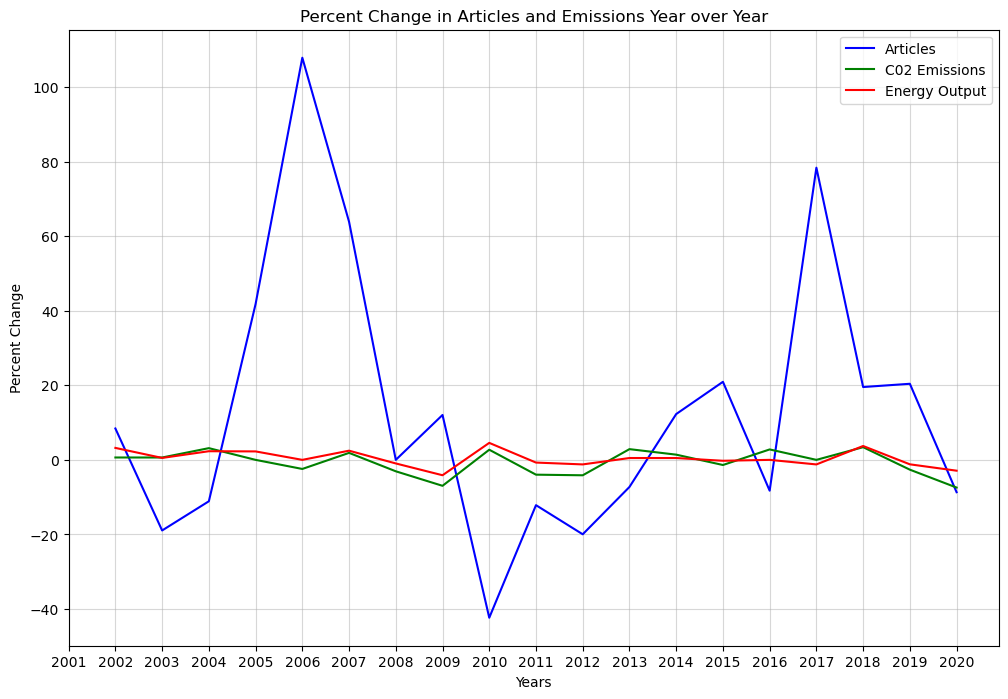

In [6]:

# Calculate the percent change for articles and emissions
df_graph['% Change'] = df_graph['#Articles'].pct_change() * 100
df_graph_2['% Change'] = df_graph_2['United States of America'].pct_change() * 100
df_graph_3['% Change'] = df_graph_3['Energy Production (thousand megawatthours)'].pct_change() * 100

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the percent change for articles
ax.plot(df_graph['Years'], df_graph['% Change'], label='Articles', color='blue')
ax.plot(df_graph_2['index'], df_graph_2['% Change'], label='C02 Emissions', color='green')
ax.plot(df_graph_3['Years'], df_graph_3['% Change'], label='Energy Output', color='red')
ax.set_title('Percent Change in Articles and Emissions Year over Year')
ax.set_xlabel('Years')
ax.set_xticks(df_graph['Years'])
ax.set_ylabel('Percent Change')
ax.grid(alpha=0.5)
ax.legend()

plt.savefig("Visual/Q3_Fig_1-Percent_Change_Articles_Emissions.png")

plt.show()